**DAAWAT RICE DATASET Analysis**

*Overview of Dataset*

Daawat Basmati Rice is one of the most popular rice brands in the world. In our dataset we'll be analysising companies financial aspect on basis of five countries it is currently operating in namely United States, United Kingdom, India, Malaysia and Philippines. The dataset also contains the basic financial analysis information which include units sold, Revenue, Cost, Profit. The data also contains the information about the product category it sold. As, it is importat for every company to analysis it's financial position in terms of units it sold , revenue generation and accordingly investing in the specifc product and region. Thus, we'll be analysing the dataset on the same parameters.

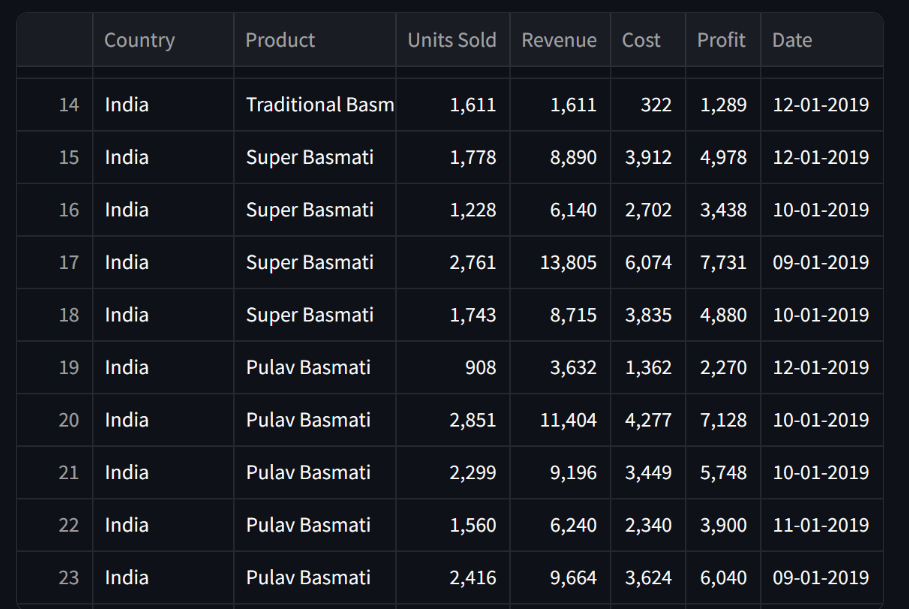

**Objectives**

1. To find the country generating the most Revenue and Profit.

2. To find most Revenue generating Daawat Variant.

3. To find the no. of units sold in each Variant Category.

4. To find which Variant is most Demanding and Profitable in which Country.

5. To find on which date the most Revenue is generated.

6. To find the Percent of each Variant category in Total Number of units sold.

7. To find the Percent of each Variant Category in Total Profit generation.

8. To check whether the data is normally distributed.

9. To find the per unit price of product in each category.

10. To check whether the product wise and country wise revenue data has mean and median statisti equally distributed on not by using ANOVA And Kruskal-Wallis Test.

**Brief on the Analysis**

Financial analysis of information given in dataset will help in evaluating performance of Daawat Basmaati Rice. This information will help company in investing and disinvesting wisely in product category, distrubtion channels in different countries, positioning of specific product in specific country and cost controlling. The analysis will also help the company in future to make decisions of expanision in different geography and product line of related and unrelated products as per consumer response.

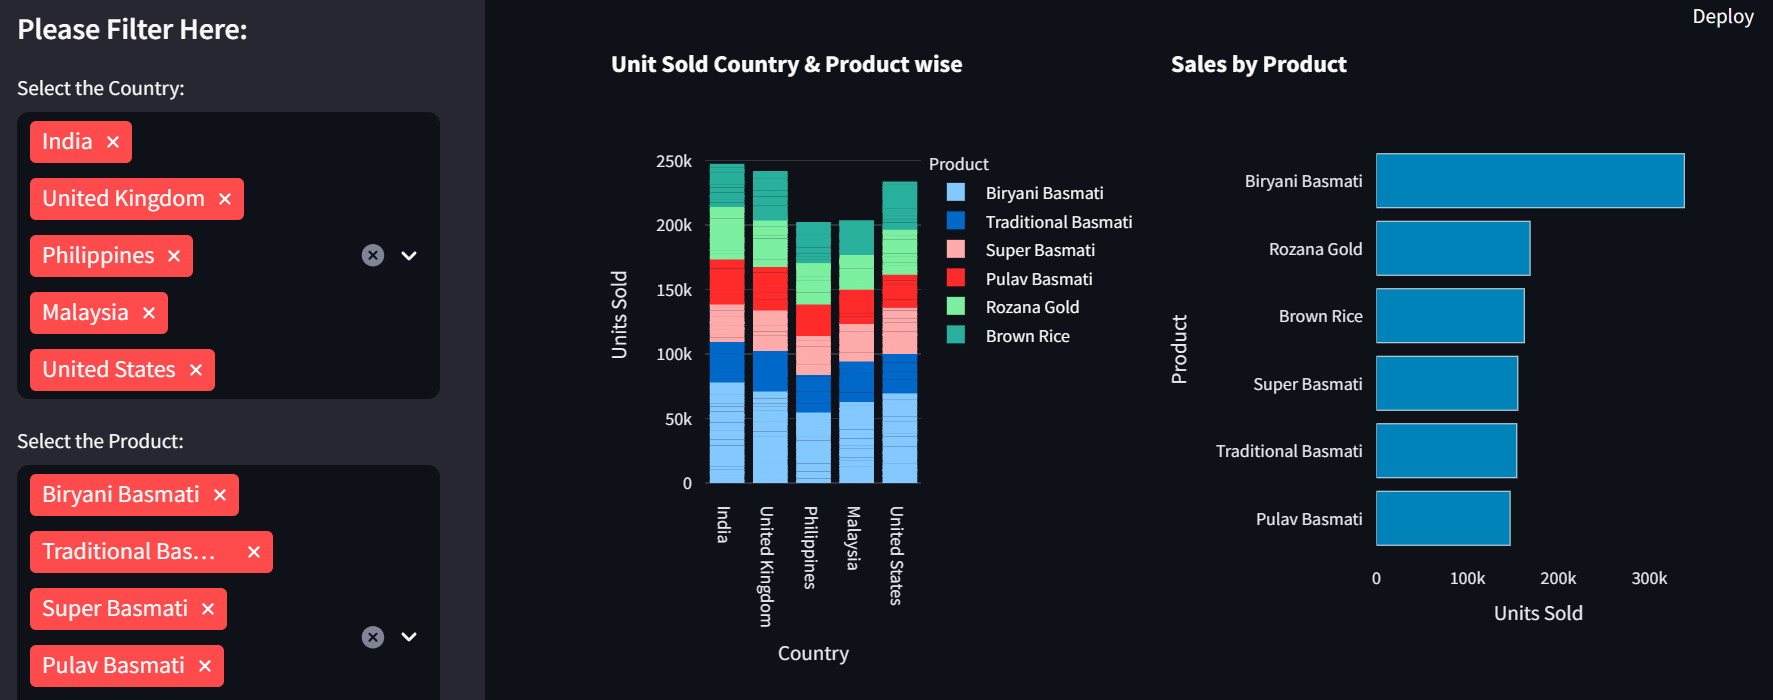

In [55]:
# Install PyDataset
!pip install pydataset

In [56]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [57]:
# importing required library
import pandas as pd
import numpy as np
import pandas as pd
import plotly.express as px
import streamlit as st
from PIL import Image
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.io as pio
from pydataset import data
import pandas as pd, numpy as np 
import scipy.stats as sps 
import statsmodels.api as sm, statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
!pip install dash
!pip install dash_core_components
!pip install dash_html_components
!pip install plotly

In [58]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Define File Path: Replace xxxxx with the appropriate File Path
file_path = r'Daawat Rice Dataset.csv'

# Import & Read Dataset
df = pd.read_csv(file_path)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.H1("DAAWAT RICE Sales Analysis (Country Wise)", style={'color': 'darkblue'}),

    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df['Country'].unique()],
        value='All',
        multi=False,
        placeholder='Select a country',
        style={'color': 'blue'}
    ),

    dcc.Graph(id='bar-chart'),

    dcc.Graph(id='scatter-plot'),

    dcc.DatePickerRange(
        id='date-picker',
        start_date=df['Date'].min(),
        end_date=df['Date'].max(),
        display_format='YYYY-MM-DD',
        style={'margin-top': 20}
    ),

    dcc.Dropdown(
        id='pie-variable-dropdown',
        options=[{'label': col, 'value': col} for col in ['Revenue', 'Profit']],
        value='Revenue',
        multi=False,
        placeholder='Select variable for Pie Chart',
        style={'color': 'green', 'margin-top': 20}
    ),

    dcc.Graph(id='pie-chart'),

    dcc.Dropdown(
        id='line-variable-dropdown',
        options=[{'label': col, 'value': col} for col in ['Units Sold', 'Profit']],
        value='Units Sold',
        multi=False,
        placeholder='Select variable for Line Chart',
        style={'color': 'orange', 'margin-top': 20}
    ),

    dcc.Graph(id='line-chart')
])

# Define callback to update all charts based on user input
@app.callback(
    [Output('bar-chart', 'figure'),
     Output('scatter-plot', 'figure'),
     Output('pie-chart', 'figure'),
     Output('line-chart', 'figure')],
    [Input('country-dropdown', 'value'),
     Input('date-picker', 'start_date'),
     Input('date-picker', 'end_date'),
     Input('pie-variable-dropdown', 'value'),
     Input('line-variable-dropdown', 'value')]
)
def update_charts(selected_country, start_date, end_date, pie_variable, line_variable):
    filtered_df = df if selected_country == 'All' else df[df['Country'] == selected_country]
    filtered_df = filtered_df[(filtered_df['Date'] >= start_date) & (filtered_df['Date'] <= end_date)]

    # Bar chart
    bar_fig = px.bar(filtered_df, x='Product', y='Revenue', color='Product', title='Revenue by Product',
                     color_discrete_sequence=px.colors.sequential.Blues)

    # Scatter plot
    scatter_fig = px.scatter(filtered_df, x='Date', y='Units Sold', color='Product', title='Units Sold over Time',
                             color_discrete_sequence=px.colors.sequential.Blues)

    # Pie chart
    pie_fig = px.pie(filtered_df, names='Product', values=pie_variable, title=f'{pie_variable} Distribution',
                    color_discrete_sequence=px.colors.sequential.Blues)

    # Line chart
    line_fig = px.line(filtered_df, x='Date', y=line_variable, color='Product', title=f'{line_variable} over Time',
                      color_discrete_sequence=px.colors.sequential.Blues)

    return bar_fig, scatter_fig, pie_fig, line_fig

# Run the app
if __name__ == '__main__':
    app.run_server(mode='inline')

**Observations**

1. Price of all the product category are same throughout the countries - Biryani Basmati - 5 per unit , Traditional Basmati - 1 per unit, Super Basmati 5 per unit, Pulav Basmati 4 per unit, Rozana Gold 3 per unit and Brown Rice 6 per unit.
2. Total no. of units sold by company in Jan'2019 and Jan'2020 is 1,125,824.
3. Total profit generated by company during the given period is US Dollar 2,763,4144.
4. The maximum no. of units sold by company was on 4th Jan'2020 in US (4493units) and the least were sold on 5th Jan'2020 of Traditional Basmati in Inida.
5. Revenue generated from India on an average is highest = US Dollar 7331.25 and Revenue generated from Malaysia on an average is lowest = US Dollar 5976.19.
6. The most revenue generating product of company is Biryani Basmati that too in Inida followd by Biryani Basmati in US and in Philliphness Traditional Basmati is generating the least revenue for company.
7. While observing the data it can be imputed that Biryani Basmati is the most favourite rice variant and Traditional Basmati is the least preffered category throughout the countries.
8. India is also the most profit generating country for company as compared to other countries mentioned.
9. In terms of unit sold Biryani Basmati (30%) is at top followed by Rozana Gold (15%), Brown Rice (14.4) and at last it's Pulav Basmati with (13%).
10. Malaysia is the least revenue generating country for company.

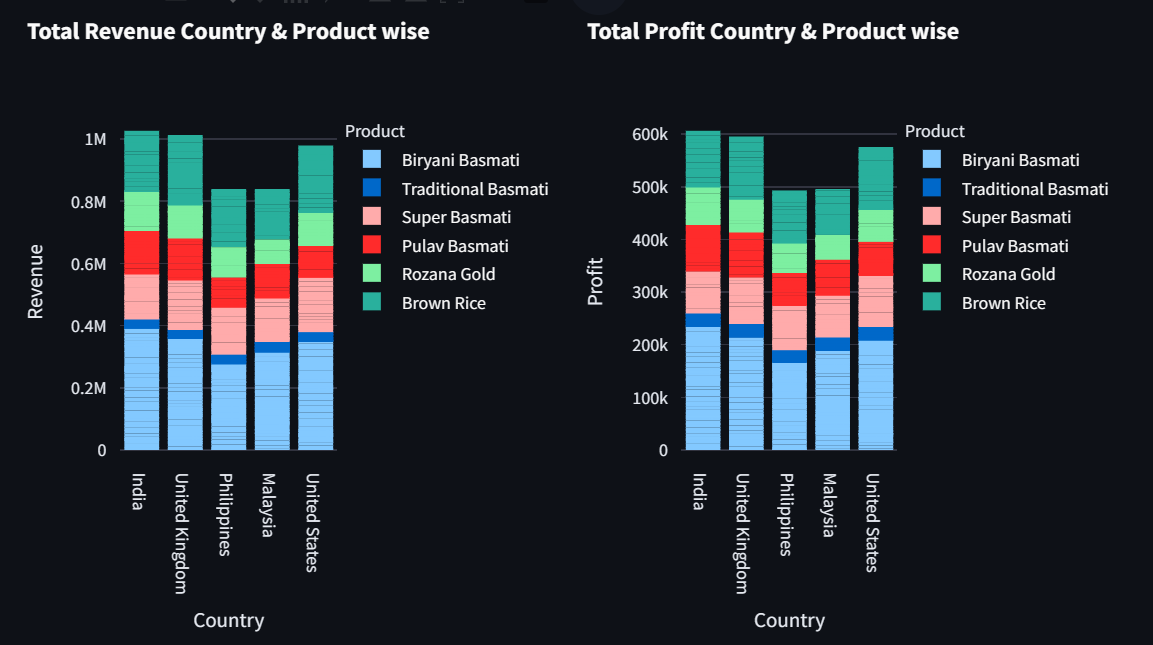

**Managerial Implications**

1. Company should focus more on launching similar variant product category as Biryani Basmati as they are most preferred by the customers.

2. Company can also think of expanding their distribution in Asian countries.

3. Although Traditional Basmati rice are generating less revenue but they are not least preferred by customer as there units sold are more than Pulav Basmati.

4. India and Phillipines revenue and unit sale pattern seems to be similar are ANOVA test.

5. Malaysia and US revenue pattern are highly related.

6. Company should focus more on promotion in Malaysia and Philipines.

7. Company should also work on quality of Traditional Basmati and Pulav Basmati category and should do survey to analyse customer behaviour and preference to current category.

**REPORT: Daawat Basmati Rice Dataset Analysis**

***Key Findings***

- Revenue and Profit: India leads in both revenue and profit generation, followed by the US and Philippines. Malaysia generates the least.
- Product Popularity: Biryani Basmati is the most popular product across all countries, while Traditional Basmati is the least preferred.
- Units Sold: Biryani Basmati also tops in unit sales, followed by Rozana Gold and Brown Rice. Pulav Basmati has the lowest sales.
- Profitability by Product: Biryani Basmati remains the most profitable across countries, followed by Super Basmati in the US and Fortune Cookie in the Philippines.
- Sales Trends: India and Philippines share similar revenue and unit sale patterns, while Malaysia and the US show high correlation.
- Price Consistency: Product prices are the same across all countries.

***Managerial Imperitives***

- *Focus on Biryani-like Products:* Expand product offerings similar to Biryani Basmati due to its high popularity.

- *Target Asian Markets:* Consider expanding distribution in Asian countries based on strong performance in India and Philippines.

- *Revitalize Less Popular Products:* Improve the quality and marketing of Traditional Basmati and Pulav Basmati to increase sales.

- *Marketing Strategies:* Tailor marketing campaigns in Malaysia and Philippines to boost revenue based on their unique sales patterns.

- *Customer Research:* Conduct surveys to understand customer preferences and adapt product offerings accordingly.

- *Cost Control:* Maintain consistent pricing across countries to simplify cost management.

***Further Analysis***

- Investigate reasons behind Traditional Basmati's low revenue despite higher unit sales.
- Analyze seasonal variations in sales and revenue across countries and products.
- Explore the effectiveness of existing marketing campaigns in different regions.
- Evaluate the potential for introducing new product categories.

***Overall***

This analysis provides valuable insights into Daawat Basmati Rice's performance across various countries and product categories. The company can leverage these findings to make informed decisions on product development, distribution, marketing, and cost control to enhance its competitive advantage and drive future growth.

In [59]:
# Define File Path : Replace xxxxx with appropriate File Path
file_path = r'Daawat Rice Dataset.csv'

# Import & Read Dataset
df = pd.read_csv(file_path)
df

,Country,Product,Units Sold,Revenue,Cost,Profit,Date
0,India,Biryani Basmati,1725,8625,3450,5175,11-01-2019
1,India,Biryani Basmati,2152,10760,4304,6456,12-01-2019
2,India,Biryani Basmati,2349,11745,4698,7047,09-01-2019
3,India,Biryani Basmati,1228,6140,2456,3684,10-01-2019
4,India,Biryani Basmati,1389,6945,2778,4167,10-01-2019
...,...,...,...,...,...,...,...
695,United States,Brown Rice,1596,9576,4389,5187,09-01-2020
696,United States,Brown Rice,986,5916,2712,3205,10-01-2020
697,United States,Brown Rice,606,3636,1667,1970,04-01-2020
698,United States,Brown Rice,2460,14760,6765,7995,07-01-2020


In [60]:
#fidning the shape of dataset
df.shape

(700, 7)

In [61]:
#to count the no. of null cells in each column
df.isnull().sum()

Country       0
Product       0
Units Sold    0
Revenue       0
Cost          0
Profit        0
Date          0
dtype: int64

1. Data Analysis : Descriptive Statistics

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     700 non-null    object
 1   Product     700 non-null    object
 2   Units Sold  700 non-null    int64 
 3   Revenue     700 non-null    int64 
 4   Cost        700 non-null    int64 
 5   Profit      700 non-null    int64 
 6   Date        700 non-null    object
dtypes: int64(4), object(3)
memory usage: 38.4+ KB


In [63]:
df.describe()

,Units Sold,Revenue,Cost,Profit
count,700.000000,700.000000,700.000000,700.000000
mean,1608.320000,6700.455714,2752.868571,3947.734286
std,867.449766,4623.900732,2037.016446,2615.818560
min,200.000000,200.000000,40.000000,160.000000
25%,905.000000,2854.000000,1113.750000,1848.250000
50%,1542.500000,5871.500000,2423.500000,3424.500000
75%,2229.500000,9580.000000,3926.000000,5566.750000
max,4493.000000,23988.000000,10995.000000,13479.000000


In [64]:
df.describe(include=['object'])

,Country,Product,Date
count,700,700,700
unique,5,6,16
top,India,Biryani Basmati,10-01-2019
freq,140,202,70


In [65]:
df.describe(include="all")

,Country,Product,Units Sold,Revenue,Cost,Profit,Date
count,700,700,700.000000,700.000000,700.000000,700.000000,700
unique,5,6,NaN,NaN,NaN,NaN,16
top,India,Biryani Basmati,NaN,NaN,NaN,NaN,10-01-2019
freq,140,202,NaN,NaN,NaN,NaN,70
mean,NaN,NaN,1608.320000,6700.455714,2752.868571,3947.734286,NaN
std,NaN,NaN,867.449766,4623.900732,2037.016446,2615.818560,NaN
min,NaN,NaN,200.000000,200.000000,40.000000,160.000000,NaN
25%,NaN,NaN,905.000000,2854.000000,1113.750000,1848.250000,NaN
50%,NaN,NaN,1542.500000,5871.500000,2423.500000,3424.500000,NaN
75%,NaN,NaN,2229.500000,9580.000000,3926.000000,5566.750000,NaN


<Axes: xlabel='Product', ylabel='Units Sold'>

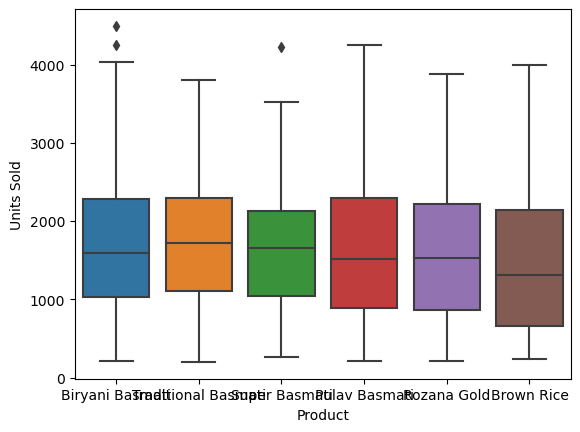

In [66]:
# relationship between "Units Sold" and "Product"

import seaborn as sns
sns.boxplot(x="Product", y="Units Sold", data=df )

**Analysis**


*Key Observations*

- Biryani Basmati dominates: highest median sales & widest variability.
- Rozana Gold & Brown Rice hold their own with some variability.
- Traditional Basmati & Pulav Basmati lag behind but consistent.
- Few outliers, especially for Biryani Basmati & Rozana Gold, warrant investigation.

*Actionable Points*

- Boost Traditional Basmati & Pulav Basmati sales through targeted marketing.
- Understand outlier success to replicate for all products.
- Segment sales data to refine marketing strategies.

<Axes: xlabel='Country', ylabel='Revenue'>

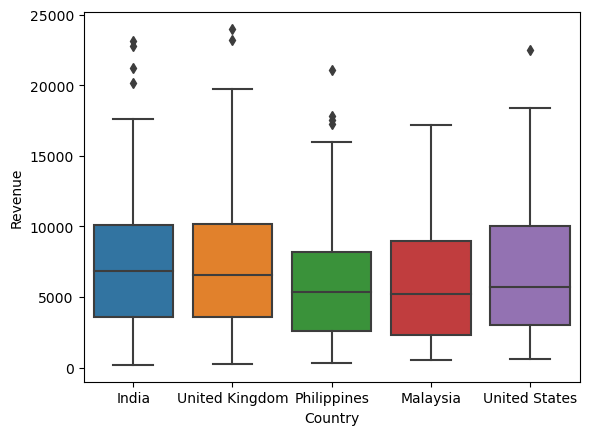

In [67]:
# relationship between "Revenue" and "Country"

import seaborn as sns
sns.boxplot(x="Country", y="Revenue", data=df)

<Axes: xlabel='Country', ylabel='Units Sold'>

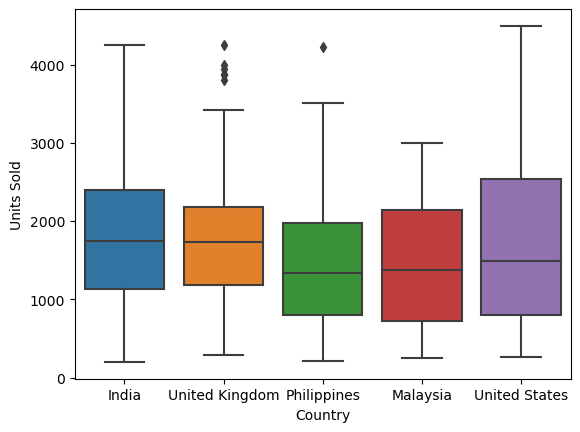

In [68]:
# relationship between "Units Sold" and "Country"

import seaborn as sns
sns.boxplot(x="Country", y="Units Sold", data=df)

**Analysis**


*Key Observations*

- Sales leaders: US leads with highest median sales and variability, followed by India and Philippines.
- Low performers: Malaysia and UK lag behind with consistent but lower sales.
- Outliers: Investigate high sales exceptions in US & India for potential replication.
- Actionable points: Boost sales in Malaysia & UK, learn from outlier successes, segment data for targeted marketing.

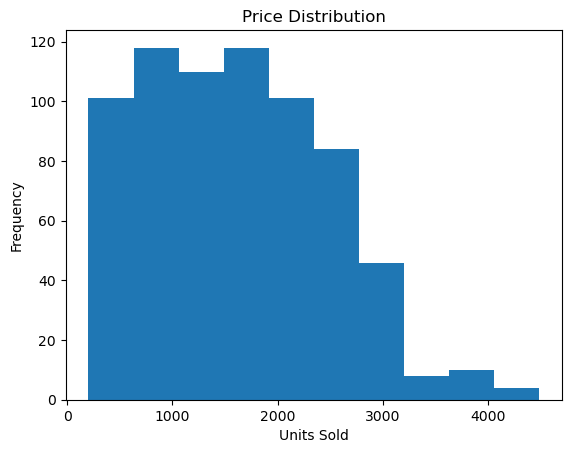

In [69]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.hist(df["Units Sold"])

# Set x/y labels and plot title
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.title("Price Distribution")

# Display the plot
plt.show()


Text(0.5, 1.0, 'Profit distribution')

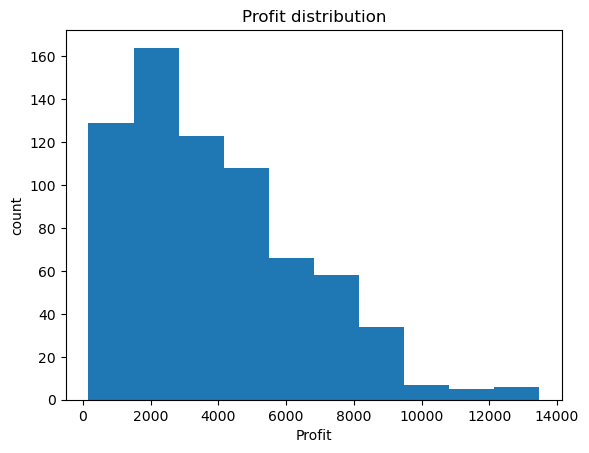

In [70]:
#to find the frequency of profit distribution using histrogram
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Profit"])

# set x/y labels and plot title
plt.pyplot.xlabel("Profit")
plt.pyplot.ylabel("count")
plt.pyplot.title("Profit distribution")

In [71]:
#finding country and product specific revenue 
df_group_one = df[['Country','Product','Revenue']]
df_group_one

,Country,Product,Revenue
0,India,Biryani Basmati,8625
1,India,Biryani Basmati,10760
2,India,Biryani Basmati,11745
3,India,Biryani Basmati,6140
4,India,Biryani Basmati,6945
...,...,...,...
695,United States,Brown Rice,9576
696,United States,Brown Rice,5916
697,United States,Brown Rice,3636
698,United States,Brown Rice,14760


In [72]:
# grouping results
df_gptest = df[['Country','Product','Revenue','Units Sold']]
grouped_test1 = df_gptest.groupby(['Country','Product'],as_index=False).mean()
grouped_test1

,Country,Product,Revenue,Units Sold
0,India,Biryani Basmati,9308.571429,1861.714286
1,India,Brown Rice,9739.500000,1623.250000
2,India,Pulav Basmati,6961.000000,1740.250000
3,India,Rozana Gold,5625.000000,1875.000000
4,India,Super Basmati,8120.277778,1624.055556
5,India,Traditional Basmati,1749.444444,1749.444444
6,Malaysia,Biryani Basmati,7910.250000,1582.050000
7,Malaysia,Brown Rice,7238.181818,1206.363636
8,Malaysia,Pulav Basmati,6049.777778,1512.444444
9,Malaysia,Rozana Gold,3919.350000,1306.450000


In [73]:
grouped_pivot = grouped_test1.pivot(index='Country',columns='Product')
grouped_pivot

Revenue                                          \
Product        Biryani Basmati   Brown Rice Pulav Basmati  Rozana Gold   
Country                                                                  
India              9308.571429  9739.500000   6961.000000  5625.000000   
Malaysia           7910.250000  7238.181818   6049.777778  3919.350000   
Philippines        6961.750000  8468.181818   4988.800000  4245.136364   
United Kingdom     8950.875000  9984.545455   7568.222222  4878.545455   
United States      8683.500000  9328.956522   6075.058824  4500.130435   

                                                      Units Sold               \
Product        Super Basmati Traditional Basmati Biryani Basmati   Brown Rice   
Country                                                                         
India            8120.277778         1749.444444     1861.714286  1623.250000   
Malaysia         7099.000000         1587.700000     1582.050000  1206.363636   
Philippines      8504.166667         1558.944444     1392.350000  1411.363636   
United Kingdom   8778.888889         1564.150000     1790.175000  1664.090909   
United States    8867.500000         1859.588235     1736.700000  1554.826087   

                                                                             
Product        Pulav Basmati  Rozana Gold Super Basmati Traditional Basmati  
Country                                                                      
India            1740.250000  1875.000000   1624.055556         1749.444444  
Malaysia         1512.444444  1306.450000   1419.800000         1587.700000  
Philippines      1247.200000  1415.045455   1700.833333         1558.944444  
United Kingdom   1892.055556  1626.181818   1755.777778         1564.150000  
United States    1518.764706  1500.043478   1773.500000         1859.588235

Heat map to visualize the relationship between Country and Product vs. Revenue

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline 

Mismatch between the number of columns and row labels.


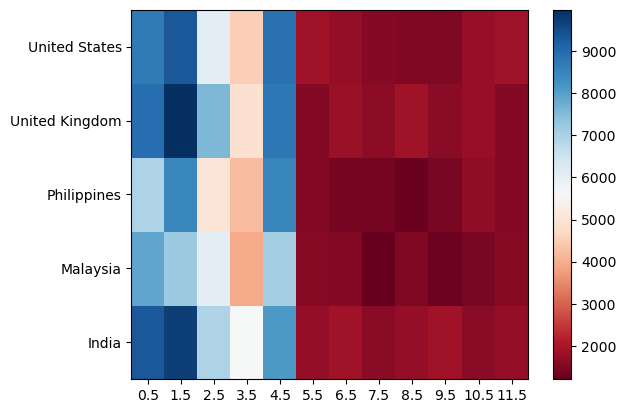

In [75]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# insert labels
if len(row_labels) == grouped_pivot.shape[1]:
    ax.set_xticklabels(row_labels, minor=False, rotation=90)
else:
    print("Mismatch between the number of columns and row labels.")

ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
plt.show()

In [76]:
fig = go.Figure(data=go.Choropleth(
    locations=df['Country'],
    z = df['Units Sold'],
    locationmode = 'country names', 
    colorscale = 'jet',
    colorbar_title = "Units Sold",
))

fig.update_layout(
    title = dict(text = '<b>Countries Population Growth Rate</b>',
    x = 0.5)
)

fig.show()

This world map shows:
India is the top country by profit generation among Malaysia, Philippines, United Kingdom, United States

In [77]:
cont_Units_Sold = df.groupby('Product',)[['Units Sold']].sum().sort_values(by = 'Units Sold', ascending = False)
cont_Units_Sold

,Units Sold
Product,
Biryani Basmati,338243
Rozana Gold,168787
Brown Rice,162426
Super Basmati,155318
Traditional Basmati,154201
Pulav Basmati,146849


In [78]:
import plotly.offline as pyo
import plotly.graph_objs as go

fig = go.Figure(data = go.Pie(labels = cont_Units_Sold.index, values = cont_Units_Sold['Units Sold'].values))
fig.update_traces(hoverinfo='label',
                  hole = 0.4,
                  textfont_size = 18,
                  textposition ='auto',
                  marker=dict(colors = ['red', 'green', 'blue']
,
                              line = dict(color = 'white',
                                          width = 2)))
fig.update_layout(title ={'text' : '<b>Percent of product category in unit sold</b>', 
                          'x' : 0.21},
                          template = 'xgridoff',
                          width = 900, height = 600,
                     legend=dict(
                        title_font_family="Times New Roman",
                        font=dict(
                        family="Courier",
                        size=20,
                        color="black" 
                        ),
                        bgcolor="white",
                        bordercolor="Black",
                        borderwidth=2.5)
                 )
iplot(fig)

**Analysis**


*Key Takeaway*

"Super Basmati" dominates sales at 30%, followed by "Biryani Basmati" and "Brown Rice"
6 categories make up the remaining 70% of sales.

*Managerial Recommendations*

- Focus marketing on Super Basmati while exploring growth opportunities for Brown Rice and Rozana Gold.
- Consider analyzing additional data like revenue and profit to guide further decisions.

In [79]:
cont_Revenue = df.groupby('Country',)[['Revenue']].sum().sort_values(by = 'Revenue', ascending = False)
cont_Revenue

,Revenue
Country,
India,1026375
United Kingdom,1010554
United States,977648
Philippines,839075
Malaysia,836667


In [80]:
data = go.Bar(x = cont_Revenue.index, y = cont_Revenue['Revenue'], text = cont_Revenue['Revenue'],textposition ='outside',
              textfont = dict(size = 12,
                             color = 'green'),
              marker = dict(
                            opacity = 0.7,
                            line_color = 'red',
                            line_width = 2))
layout = go.Layout(title = {'text': "<b>Country Wise Revenue</b>",
                           'x':0.5,
                           'xanchor': 'center'},
                   xaxis = dict(title='<b>Country</b>'),
                   yaxis =dict(title='<b>Revenue</b>'),
                   width = 900,
                   height = 600,
                   template = 'plotly_white')
fig=go.Figure(data = data, layout = layout)

iplot(fig)

**Analysis**

*Key Points*

- Bar chart displays country-wise revenue for 5 countries.
- India leads with $1M+, followed by UK & US at $800k+ each.
- Philippines & Malaysia lag at $300k & $200k respectively.
- Wide gap between top 3 and bottom 2 countries.

*Insights*

- India could excel due to population, purchasing power, or marketing.
- UK & US likely compete in similar markets.
- Lower revenue in PH & MY could be from smaller populations or less brand awareness.

*Recommendations*

- Analyze factors behind revenue gaps.
- Segment data by product or other relevant variables.
- Compare revenue growth over time.

In [81]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame

sales_by_product = df.groupby(by=['Product']).sum(numeric_only=True)[['Units Sold']].sort_values(by=['Units Sold'])
fig_Product_sales = px.bar(
    sales_by_product,
    x='Units Sold', y=sales_by_product.index,
    orientation='h', title="<b>Sales by Product</b>",
    color_discrete_sequence=["#0083B8"] * len(sales_by_product),
    template="plotly_white",
)
fig_Product_sales.show()

In [82]:
fig = px.scatter(df, x="Units Sold", y="Revenue", color="Product", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

2. Data Analysis : Inferential Statistics

In [83]:
# finding price 
grouped_test1['Price'] = grouped_test1['Revenue']/grouped_test1['Units Sold']
grouped_test1

,Country,Product,Revenue,Units Sold,Price
0,India,Biryani Basmati,9308.571429,1861.714286,5.0
1,India,Brown Rice,9739.500000,1623.250000,6.0
2,India,Pulav Basmati,6961.000000,1740.250000,4.0
3,India,Rozana Gold,5625.000000,1875.000000,3.0
4,India,Super Basmati,8120.277778,1624.055556,5.0
5,India,Traditional Basmati,1749.444444,1749.444444,1.0
6,Malaysia,Biryani Basmati,7910.250000,1582.050000,5.0
7,Malaysia,Brown Rice,7238.181818,1206.363636,6.0
8,Malaysia,Pulav Basmati,6049.777778,1512.444444,4.0
9,Malaysia,Rozana Gold,3919.350000,1306.450000,3.0


In [84]:
# Shapiro-Wilk Test : Null Hypothesis :: Data is Normally Distributed (p-value >= 5% by default)
# Test of Normality of "Units Sold" data

normality_test_shapiro = sps.shapiro(df['Units Sold']) 
normality_test_shapiro

ShapiroResult(statistic=0.969701886177063, pvalue=7.456370937353185e-11)

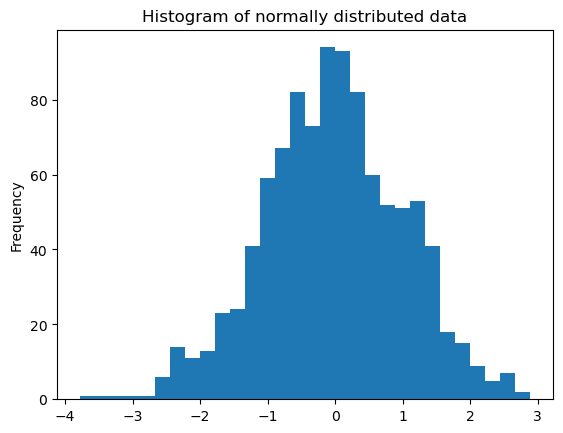

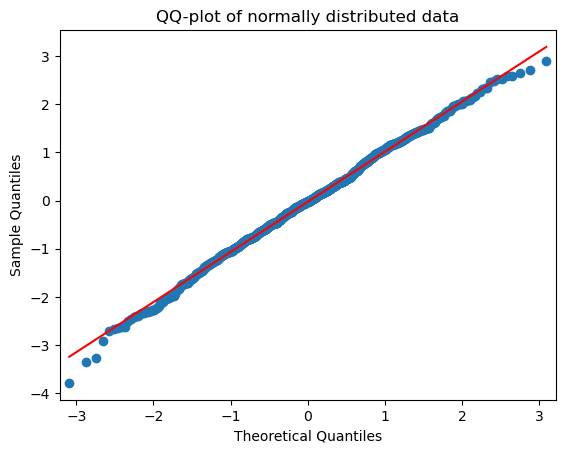

In [85]:
# Create a sample DataFrame with a normally distributed column
df1 = pd.DataFrame({'normal': np.random.normal(size=1000)})

# Plot a histogram of the data
df1['normal'].plot(kind='hist', bins=30)
plt.title('Histogram of normally distributed data')
plt.show()

# Create a QQ-plot of the data
sm.qqplot(df1['normal'], line='s')
plt.title('QQ-plot of normally distributed data')
plt.show()
#as the p vale is greater than 5 percent thus the data is normally distributed

In [86]:
#distributing data on country wise
df_India = df[df.Country == 'India'] # Subset df with country == India 
df_Malaysia = df[df.Country == 'Malaysia'] # Subset df with country == Malaysia 
df_UK = df[df.Country == 'United Kingdom'] # Subset df with country == UK
df_US = df[df.Country == 'United States'] # Subset df with country == US
df_Philippines = df[df.Country == 'Philippines'] # Subset df with country ==  Philippines 

In [87]:
# ANOVA : Null Hypothesis :: Mean of Population 1 (Sample 1) = Mean of Population 2 (Sample 2) = ... = Mean of Population n (Samp

In [88]:
# ANOVA Using Scipy
mean_test_anova_scipy = sps.f_oneway(df_India.Revenue, df_Malaysia.Revenue,df_UK.Revenue,df_US.Revenue,df_Philippines.Revenue) # ANOVA
print(mean_test_anova_scipy)

F_onewayResult(statistic=2.930245513815576, pvalue=0.02023964892685341)


In [89]:
mean_pairwise_compare_scipy = sps.tukey_hsd(df_India.Revenue, df_Malaysia.Revenue,df_UK.Revenue,df_US.Revenue,df_Philippines.Revenue) # Tukey HSD
print(mean_pairwise_compare_scipy)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)   1355.057     0.100  -148.167  2858.282
 (0 - 2)    113.007     1.000 -1390.217  1616.232
 (0 - 3)    348.050     0.970 -1155.175  1851.275
 (0 - 4)   1337.857     0.108  -165.367  2841.082
 (1 - 0)  -1355.057     0.100 -2858.282   148.167
 (1 - 2)  -1242.050     0.159 -2745.275   261.175
 (1 - 3)  -1007.007     0.356 -2510.232   496.217
 (1 - 4)    -17.200     1.000 -1520.425  1486.025
 (2 - 0)   -113.007     1.000 -1616.232  1390.217
 (2 - 1)   1242.050     0.159  -261.175  2745.275
 (2 - 3)    235.043     0.993 -1268.182  1738.267
 (2 - 4)   1224.850     0.170  -278.375  2728.075
 (3 - 0)   -348.050     0.970 -1851.275  1155.175
 (3 - 1)   1007.007     0.356  -496.217  2510.232
 (3 - 2)   -235.043     0.993 -1738.267  1268.182
 (3 - 4)    989.807     0.374  -513.417  2493.032
 (4 - 0)  -1337.857     0.108 -2841.082   165.367
 (4 - 1)     17.200     1.000 -1

In [90]:
# Test of Median of Two or more Populations : Non Parametric Test :: Kruskal-Wallis Test
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Null Hypothesis : Median of Population 1 (Sample 1) = Median of Population 2 (Sample 2) = ... = Median of Population n (Sample n) | (p-value >= 5% by default)

median_test_kruskal = sps.kruskal(df_India.Revenue, df_Malaysia.Revenue,df_UK.Revenue,df_US.Revenue,df_Philippines.Revenue)
print(median_test_kruskal)
# Inference : Median of countries are different  (p-value < 5%) 

KruskalResult(statistic=11.399909045010766, pvalue=0.022418835928238703)


In [91]:
# Product category wise analysis 
df_cc = df[df.Product == 'Biryani Basmati'] # Subset df with Product == Biryani Basmati
df_fc = df[df.Product == 'Traditional Basmati'] # Subset df with Product == Traditional Basmati 
df_or = df[df.Product == 'Super Basmati'] # Subset df with Product == Super Basmati
df_sn = df[df.Product == 'Pulav Basmati'] # Subset df with Product == Pulav Basmati
df_su = df[df.Product == 'Rozana Gold'] # Subset df with Product == Rozana Gold
df_wc = df[df.Product == 'Brown Rice'] # Subset df with Product ==  Brown Rice

In [92]:
# ANOVA Using Scipy
mean_test_anova_scipy_Productwise = sps.f_oneway(df_cc.Revenue, df_fc.Revenue,df_or.Revenue,df_sn.Revenue,df_su.Revenue,df_su.Revenue) # ANOVA
print(mean_test_anova_scipy_Productwise)

F_onewayResult(statistic=64.16763955329169, pvalue=4.732838887766496e-55)


In [93]:
# Test of Median of Two or more Populations : Non Parametric Test :: Kruskal-Wallis Test
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Null Hypothesis : Median of Population 1 (Sample 1) = Median of Population 2 (Sample 2) = ... = Median of Population n (Sample n) | (p-value >= 5% by default)

median_test_kruskal = sps.kruskal(df_India.Revenue, df_Malaysia.Revenue,df_UK.Revenue,df_US.Revenue,df_Philippines.Revenue)
print(median_test_kruskal)
# Inference : Median of product revenue are Different (p-value < 5%) 

KruskalResult(statistic=11.399909045010766, pvalue=0.022418835928238703)


In [94]:
# Null Hyposesis : Correlation = 0 (p-value >= 5% by default)

# Correlation between Car "mpg" and "hp"
correlation_test_pearson = sps.pearsonr(df.Revenue, df.Profit)
correlation_test_spearman = sps.spearmanr(df.Revenue, df.Profit)
print(correlation_test_pearson)
# Inference : revenue and profit are positively related (p value <5%)

PearsonRResult(statistic=0.9951625962307101, pvalue=0.0)


In [95]:
print(correlation_test_spearman)

SignificanceResult(statistic=0.9954861153567501, pvalue=0.0)


In [96]:
!pip install dash
!pip install dash_core_components
!pip install dash_html_components
!pip install plotly